In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=43ab50e0381a06de032ed29c24dd63172e2233a71924f10d5742bca1259204c4
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [ ]:
!cp '/content/gdrive/MyDrive/[MIRCV]FoodWebSearch/deployment/food_distr.zip' .
!unzip -q food_distr.zip
!rm food_distr.zip

In [ ]:
%cd "/content/gdrive/MyDrive/[MIRCV]FoodWebSearch/notebooks"

/content/gdrive/.shortcut-targets-by-id/1Lqbq3dboVPe48Cxj_XZyhRs54U4hXhEM/[MIRCV]FoodWebSearch/notebooks


In [ ]:
import import_ipynb
from index_creation import Node as nd
from index_creation import VP_Tree as vp

importing Jupyter notebook from index_creation.ipynb
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import glob
import os
import numpy as np
import PIL
from IPython.display import display
from ipywidgets import Image

from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import load_img


INDEX_PATH = "/content/gdrive/MyDrive/[MIRCV]FoodWebSearch/deployment/index/index.json"
QUERY_PATH = "/content/food_101/49494.jpg"
MODEL_PATH = "/content/gdrive/MyDrive/[MIRCV]FoodWebSearch/deployment/food_classifier.h5"
DATA_PATH = "/content/food_101/"
K = 10

In [ ]:
# Load VPTree
vp_tree=vp.load_vptree(INDEX_PATH)
print(vp.print_tree(vp_tree.root,1))


Tree loaded correctly


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Retrieve User Query Image
def load_query_image(path):
  queryImage = load_img(path, target_size=(224,224,3))
  display(queryImage)  

  np_image = np.array(queryImage)  
  np_image = tf.keras.applications.mobilenet_v2.preprocess_input(np_image)
  np_image = np.expand_dims(np_image, axis=0)  
  return np_image

def feature_extractor(model,image):
  features = model.predict(image)
  features = preprocessing.normalize(features)
  return features

def display_results(results):
  for filename, distance in results:
    print('{} - {:.3f}'.format(filename, distance))  # :.3f = 3-decimal float
    print("datapth=",DATA_PATH,filename)
    filepath = os.path.join(DATA_PATH,filename)
    image = Image.from_file(filepath, width=224, height=224)
    display(image)

In [ ]:

#loading Model
food_classifier=tf.keras.models.load_model(MODEL_PATH)
# Extract Features Using the model/mobilenet
mobilenetv2 = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3), pooling='avg')


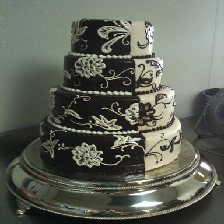

ValueError: ignored

In [ ]:
#load feature 
q_image=load_query_image(QUERY_PATH)
features=feature_extractor(mobilenetv2,q_image)
#Perform search inside the tree(KNN?)
ids,distances=vp_tree.knn_search(K,features)
id_list=[]
for id in ids:
  uniqueid=id[0]
  id_list.append(uniqueid)
zipped=zip(id_list,distances)
#for ids,dist in zipped:
  #print("id=",ids,", distanc=",dist,'\n')
display_results(zipped)

In [ ]:
#Show results 
